In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [28]:
def load_data(ticker):
    dataset = pd.read_csv(f'{ticker}.csv')
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset.drop('Adj Close', axis=1, inplace=True)
    return dataset

In [29]:
tickers = ['GOOGL', 'TSLA', 'MSFT']

for ticker in tickers:
    print(f'Processing {ticker}')
    dataset = load_data(ticker)


Processing GOOGL
Processing TSLA
Processing MSFT


In [30]:
 print(dataset.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


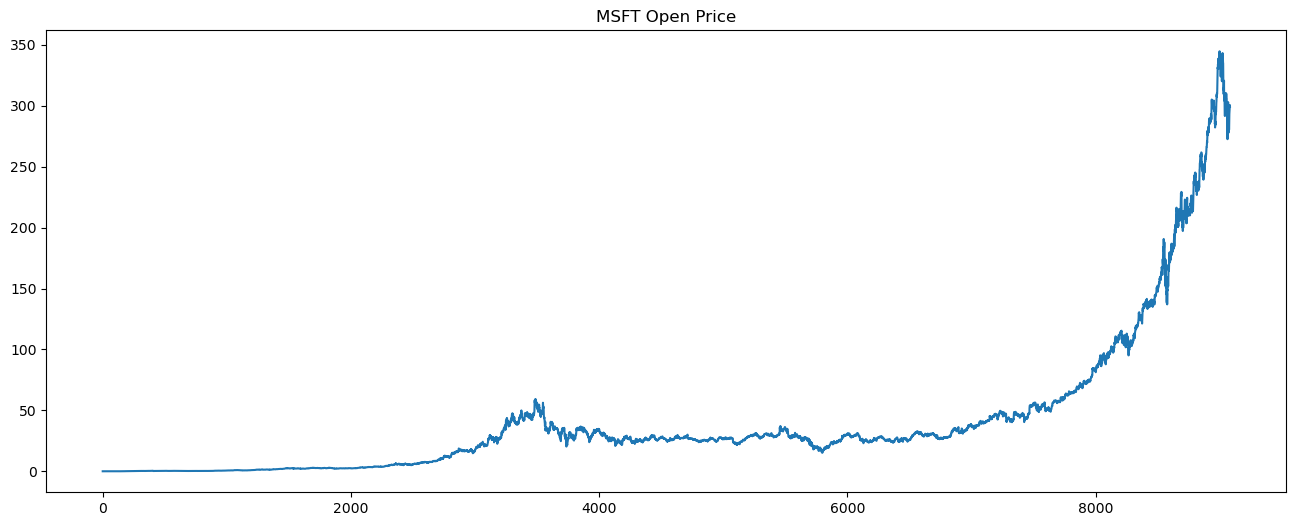

In [31]:
dataset['Open'].plot(figsize=(16, 6))
plt.title(f'{ticker} Open Price')
plt.show()

In [19]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
Y = dataset['Close']
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
predicted = regressor.predict(X_test)

In [22]:
print(f'{ticker} Evaluation:')
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(Y_test, predicted)))

MSFT Evaluation:
Coefficients: [-6.19707109e-01  8.44340567e-01  7.75269109e-01 -2.56198100e-10]
Intercept: 0.005848915005309152
Mean Absolute Error: 0.19039905034009244
Mean Squared Error: 0.20101747303746553
Root Mean Squared Error: 0.44834972179925076


In [23]:
dfr = pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': predicted})
print(dfr.head(25))

      Actual Price  Predicted Price
8050     92.000000        92.821639
8084     90.769997        92.501732
7512     56.549999        56.577777
2933     16.738281        16.684941
343       0.347222         0.338407
3000     17.281250        17.205890
8297    106.889999       106.461753
6146     26.160000        26.072643
1615      2.273438         2.263170
5589     29.389999        29.285284
8927    289.809998       289.199455
7146     44.529999        44.719570
7243     48.080002        47.997342
1238      1.376736         1.359257
2263      3.851563         3.852306
5342     30.980000        31.060916
6775     27.879999        27.963712
3752     26.468750        26.912925
1353      1.411458         1.390268
5425     29.040001        29.006681
8827    235.990005       235.742879
23        0.104167         0.101350
4724     27.250000        27.097726
1946      2.503906         2.495091
8423    138.600006       137.544053


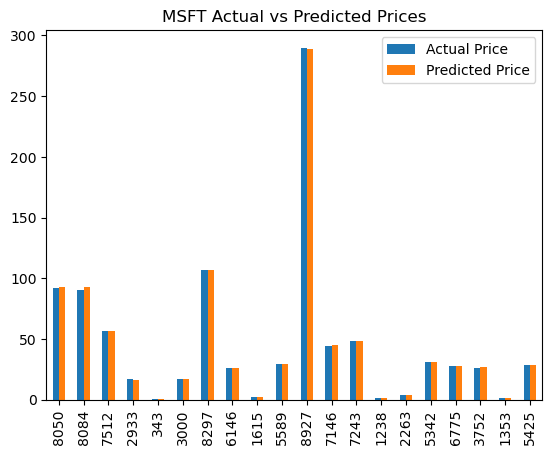

In [24]:
graph = dfr.head(20)
graph.plot(kind='bar')
plt.title(f'{ticker} Actual vs Predicted Prices')
plt.show()